PORJECT-3 : INFO_5709_COVID_VACCINE_TRACKER_VISUALIZATION

In [1]:
# importing required libraries for plotting the data visuals and data processing
# importing pandas for python data analysis operations
import pandas as pd
# importing numpy for numerical python calculations
import numpy as np
# importing matplotlib library for plotting the visuals
import matplotlib.pyplot as plt
# importing seaborn for plotting the visuals 
import seaborn as sns

In [2]:
import codecs # importing codecs to open the files with encoding utf-8
# filename: path of the file, we are opening
file_name = "Global_COVID_Vaccination_Tracker.csv"
# opening the file with help of with statement and utf-8 as encoding and ignoring other errors
with codecs.open(file_name, 'r', encoding='utf-8',
                 errors='ignore') as fdata:
    # reading the csv data file.
    df = pd.read_csv(fdata)
# displaying the first five rows of the data.
df.head()

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Global Total,5.663213e+09,NaN,NaN,NaN,33380378.0
1,Mainland China,2.129833e+09,76.1,NaN,69.3,6454714.0
2,India,7.303371e+08,26.7,40.3,12.4,7616167.0
3,EU,5.469671e+08,61.6,66.0,61.5,1394444.0
4,U.S.,3.785697e+08,59.2,62.9,53.6,721844.0


### EDA : Exploratory Data Analysis

In [3]:
# validating all the columns having null values
df.isna().sum()

Countries and regions                         0
Doses administered                            1
Enough for % of people                        5
Percentage of population with 1+ dose         7
Percentage of population fully vaccinated    10
Daily rate of doses administered              4
dtype: int64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

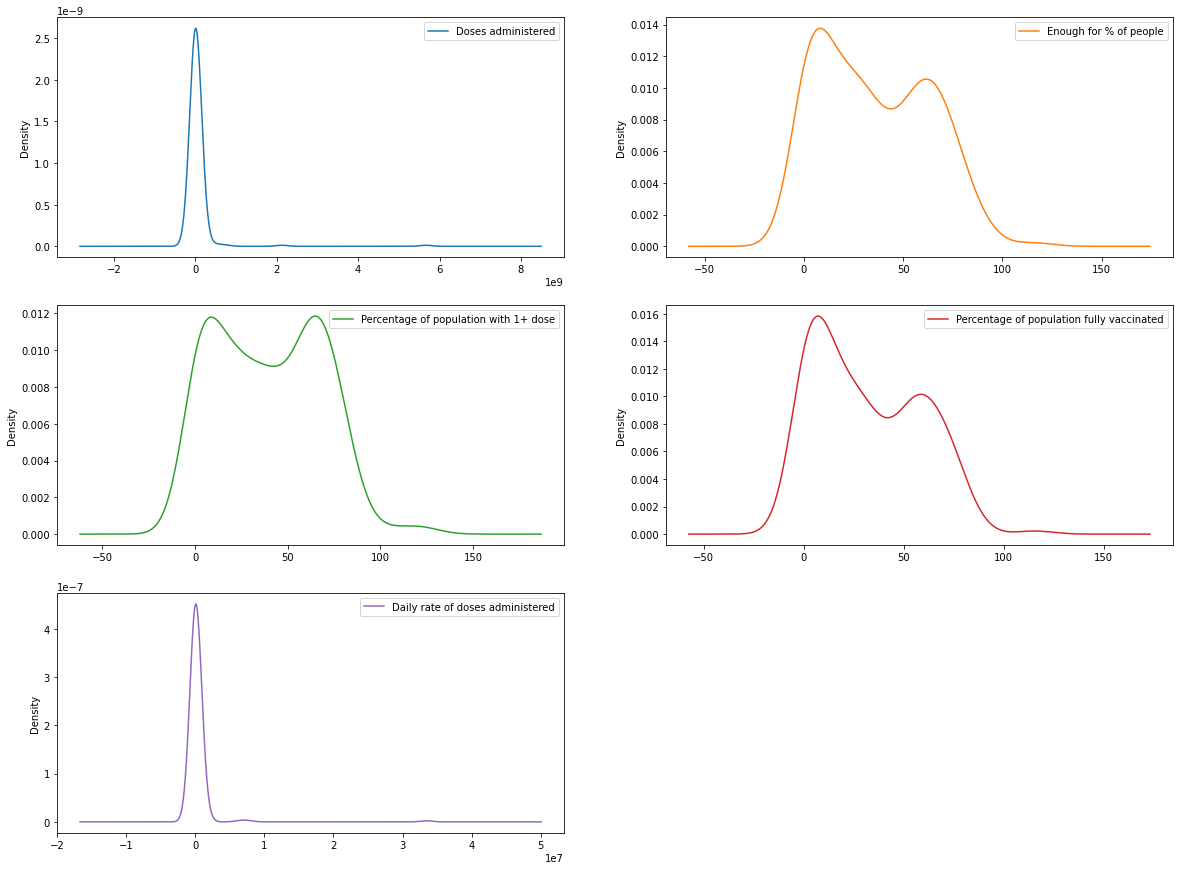

In [4]:
# displaying the kernel density distribution for all numerical columns
df.plot(kind='kde', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(20,15))

As we can see, 
* <b> Doses administered </b> has normal distribution, so replacing null values with mean.
* <b> Enough for % of people </b> has skewed distribution, so replacing null values with median.
* <b> Percentage of population with 1+ dose </b> has skewed distribution, so replacing null values with median.
* <b> Percentage of population fully vaccinated </b> has skewed distribution, so replacing null values with median.
* <b> Daily rate of doses administered </b> has normal distribution, so replacing null values with mean.

In [5]:
# filling the missing values according to the distribution of the data.
df['Doses administered'].replace(np.NaN, df['Doses administered'].mean(), inplace=True)
df['Enough for % of people'].replace(np.NaN, df['Enough for % of people'].mean(), inplace=True)
df['Percentage of population with 1+ dose'].replace(np.NaN, df['Percentage of population with 1+ dose'].mean(), inplace=True)
df['Percentage of population fully vaccinated'].replace(np.NaN, df['Percentage of population fully vaccinated'].mean(), inplace=True)
df['Daily rate of doses administered'].replace(np.NaN, df['Daily rate of doses administered'].mean(), inplace=True)

In [6]:
# re-validating if all the columns null values are filled.
df.isna().sum()

Countries and regions                        0
Doses administered                           0
Enough for % of people                       0
Percentage of population with 1+ dose        0
Percentage of population fully vaccinated    0
Daily rate of doses administered             0
dtype: int64

Removed null values successfully

In [7]:
# validating if it has any duplicate instances
df.duplicated().sum()

0

In [8]:
# dimensions of the dataset
df.shape

(207, 6)

There are no duplicates

### Visualizations

Showing Visualization for percentage of population with atleast 1 dose(partially) and percentage of population with fully vaccinated per each country and region.

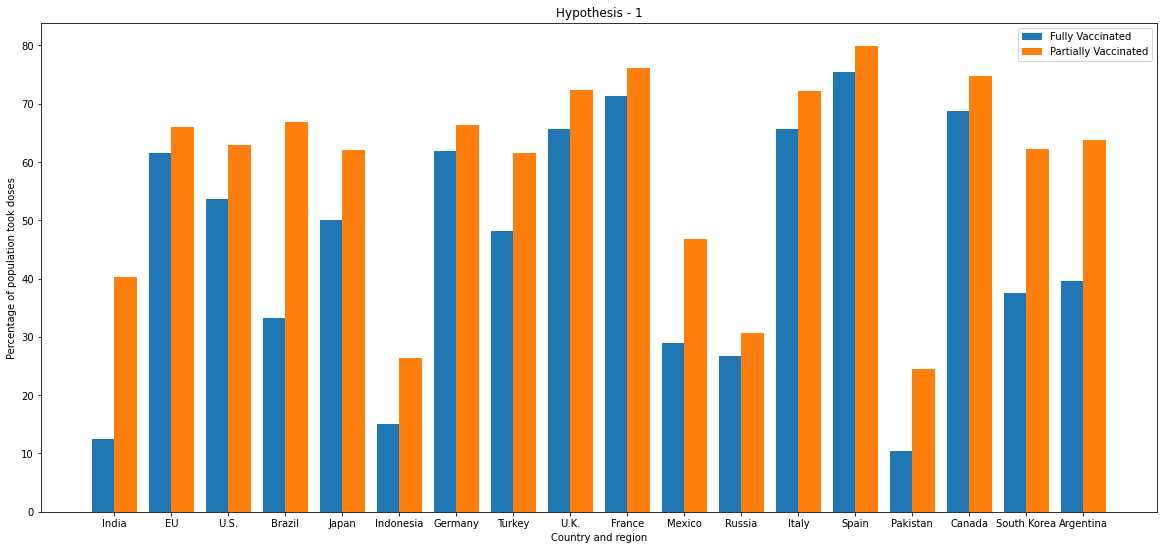

In [9]:
# plotting the vertical bar graph 
# taking top 20 countries and regions of data
x_axis = df['Countries and regions'].head(20)
# taking the percentage population accordingly with country data 
y_fully_axis = df['Percentage of population fully vaccinated'].head(20)
y_partial_axis = df['Percentage of population with 1+ dose'].head(20)

# length of num of x labels(countries)
X = np.arange(len(x_axis[2:]))
plt.figure(figsize=(20,9))
# plotting bar graph with fully vaccinated as well as partially vaccinated
plt.bar(X-0.2, y_fully_axis[2:], 0.4, label='Fully Vaccinated')
plt.bar(X+0.2, y_partial_axis[2:], 0.4, label='Partially Vaccinated')

# labeling x axis values with labels of countries
plt.xticks(X, x_axis[2:])
# xlabel and ylabel and title of bar graph
plt.xlabel("Country and region")
plt.ylabel("Percentage of population took doses")
plt.title("Hypothesis - 1")
plt.legend()
plt.show()

Showing the visualization for top 10 countries that have been doses administered.

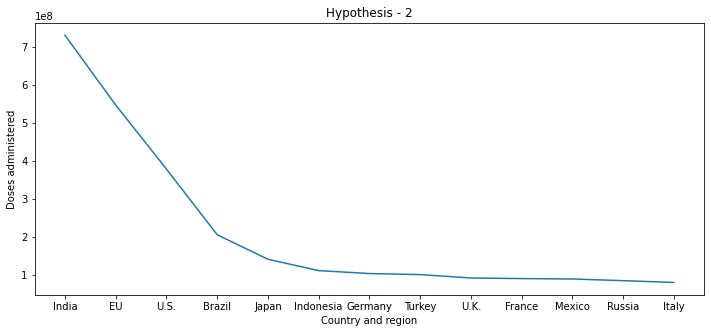

In [10]:
# plotting the line graph 
# taking top 15 countries and regions of data
x_axis = df['Countries and regions'].head(15)
# taking Num of doses administered per each country accordingly
y_axis = df['Doses administered'].head(15)

# adjusting figsize and keeping xlabel, ylabel and title
plt.figure(figsize=(12,5))
plt.plot(x_axis[2:], y_axis[2:])
plt.xlabel("Country and region")
plt.ylabel("Doses administered")
plt.title("Hypothesis - 2")
plt.show()

The daily rate of doses administered will be higher in developed countries than in developing ones.

Showing visualizations for daily rate of doses administered per each country or region

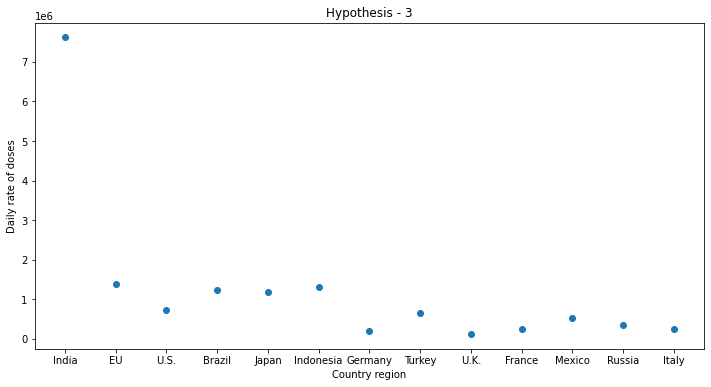

In [11]:
# plotting the scatter plot
# taking top 15 countries and regions of data
x_axis = df['Countries and regions'].head(15)
# taking daily rate of doses administered per each country
y_axis = df['Daily rate of doses administered'].head(15)

# adjusting figsize and keeping xlabel, ylabel and title
plt.figure(figsize=(12,6))
plt.scatter(x_axis[2:], y_axis[2:])
plt.xlabel("Country region")
plt.ylabel("Daily rate of doses")
plt.title("Hypothesis - 3")
plt.show()